In [1]:
pip install tensorflow

  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=ad70fd9bc2155123d253d82304b1666980bd1b8c30569e16a9f5b64b50210347
  Stored in directory: c:\users\computing\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attemptin

In [31]:
#Below code is referenced from https://morioh.com/p/fa76d93bfca8
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [13]:

train=pd.read_csv(r"C:\Users\Computing\Desktop\DATASET with csv file\object-dataset.csv") 

In [14]:
train.head()

,Image-addess,label
0,C:\Users\Computing\Desktop\DATASET with csv fi...,0
1,C:\Users\Computing\Desktop\DATASET with csv fi...,0
2,C:\Users\Computing\Desktop\DATASET with csv fi...,0
3,C:\Users\Computing\Desktop\DATASET with csv fi...,0
4,C:\Users\Computing\Desktop\DATASET with csv fi...,0


In [15]:
train.columns

Index(['Image-addess', 'label'], dtype='object')

In [147]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = tf.keras.utils.load_img(train['Image-addess'][i], target_size=(28,28,3),grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|████████████████████████████████████████████████████████████████████████████| 4709/4709 [00:03<00:00, 1483.40it/s]


In [148]:
y=train['label'].values
y = to_categorical(y)


In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [171]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [172]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 conv2d_35 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_44 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_12 (Flatten)        (None, 9216)              0         
                                                                 
 dense_29 (Dense)            (None, 128)               1179776   
                                                     

In [173]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [174]:
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
103/103 [==============================] - 3s 26ms/step - loss: 2.0129 - accuracy: 0.2816 - val_loss: 1.5513 - val_accuracy: 0.4848
Epoch 2/20
103/103 [==============================] - 3s 26ms/step - loss: 1.3121 - accuracy: 0.5370 - val_loss: 1.1035 - val_accuracy: 0.6185
Epoch 3/20
103/103 [==============================] - 3s 26ms/step - loss: 1.0078 - accuracy: 0.6456 - val_loss: 0.8450 - val_accuracy: 0.6893
Epoch 4/20
103/103 [==============================] - 3s 25ms/step - loss: 0.7704 - accuracy: 0.7148 - val_loss: 0.6413 - val_accuracy: 0.7806
Epoch 5/20
103/103 [==============================] - 3s 25ms/step - loss: 0.6179 - accuracy: 0.7773 - val_loss: 0.5489 - val_accuracy: 0.8202
Epoch 6/20
103/103 [==============================] - 3s 25ms/step - loss: 0.5150 - accuracy: 0.8152 - val_loss: 0.5052 - val_accuracy: 0.8266
Epoch 7/20
103/103 [==============================] - 3s 25ms/step - loss: 0.4536 - accuracy: 0.8307 - val_loss: 0.4561 - val_accuracy: 0.8485

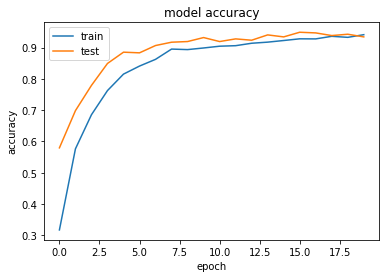

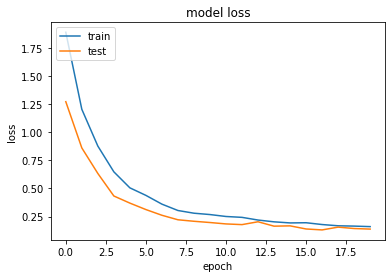

In [154]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [178]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [168]:
y_pred = model.predict(X_test)
print(y_pred)

15/15 [==============================] - 0s 5ms/step
[[2.1984448e-07 5.0682213e-14 9.9999976e-01 ... 5.7683472e-08
  5.1432327e-11 4.4288498e-15]
 [2.5016261e-04 4.9065240e-02 3.7057503e-06 ... 3.3191230e-07
  7.5935973e-06 1.2198196e-07]
 [1.6349268e-06 2.0260749e-04 1.1677734e-04 ... 9.9916971e-01
  1.5491656e-04 7.4950827e-07]
 ...
 [9.7676209e-05 9.7806531e-01 1.9506739e-05 ... 2.6268918e-07
  1.6586651e-05 2.5542622e-07]
 [7.6114386e-09 4.2715890e-11 5.2419061e-13 ... 4.1131099e-07
  9.9999940e-01 1.5134489e-09]
 [1.9946952e-12 1.4007768e-05 1.0709697e-11 ... 2.4582812e-12
  2.9658045e-10 1.7093098e-08]]


In [175]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
             

45/45 [==============================] - 0s 5ms/step
[[143   0   0   0   3   0   0   0   3   0]
 [  0  94   0  24   0  11   3   0   3   0]
 [  0   0 133   0   0   0   0   2   0   0]
 [  0  12   0 126   0  17   0   0   0   0]
 [  0   0   0   0 135   0   0   1   0   0]
 [  0   6   0  15   1 121   0   0   0   0]
 [  3   0   0   0   0   4 112   3   1   0]
 [  0   0   3   0   4   0   0 130   0   0]
 [  0   0   0   4   0   1   0   0 150   0]
 [  3   0   0   0   0   0   0   1   0 141]]


In [180]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.960     0.960     0.960       149
           1      0.839     0.696     0.761       135
           2      0.978     0.985     0.982       135
           3      0.746     0.813     0.778       155
           4      0.944     0.993     0.968       136
           5      0.786     0.846     0.815       143
           6      0.974     0.911     0.941       123
           7      0.949     0.949     0.949       137
           8      0.955     0.968     0.962       155
           9      1.000     0.972     0.986       145

    accuracy                          0.909      1413
   macro avg      0.913     0.909     0.910      1413
weighted avg      0.911     0.909     0.909      1413

